(360, 64) (360,)
             0         1  labels
0   -23.610013 -1.699337       0
1   -24.161270 -2.515203       0
2   -26.403846 -2.677801       0
3   -22.355844 -1.833101       0
4   -21.655493  3.058090       0
..         ...       ...     ...
283 -21.899767 -1.054299       0
284 -20.509565  0.577943       0
285  17.551646 -1.484451       1
286 -22.389035 -1.183871       0
287 -18.447775  1.217638       0

[288 rows x 3 columns]


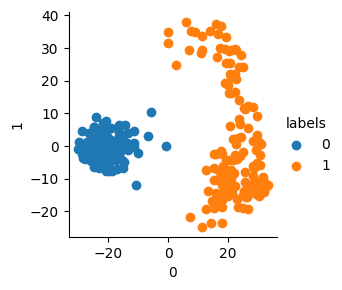

dataset: digit
Precomputed kernel classification test score and time: (0.88, 435.98985981941223) 
 Callable kernel   classification test score: (0.88, 250.22590494155884) 
 normal svc test score : (0.98, 1.0231640338897705) 


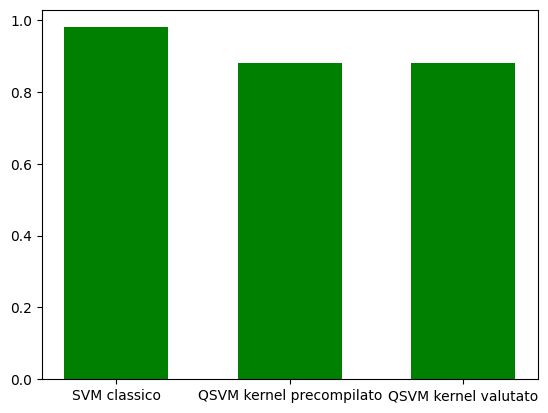

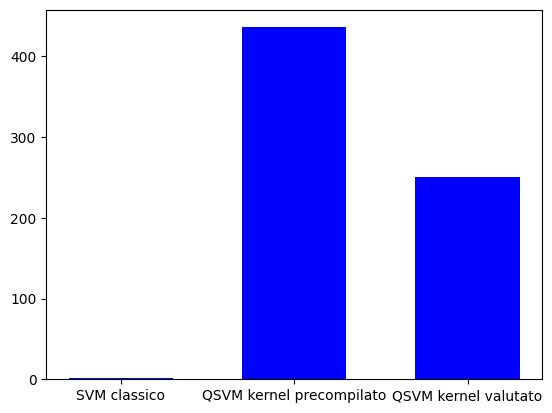

(178, 13) (178,)
              0          1  labels
0   -202.453378  17.170956       2
1    432.208078  -6.889640       0
2    -77.604309   7.756505       2
3    -72.653067   4.664269       0
4    -72.591703   8.661451       2
..          ...        ...     ...
137 -314.723268   4.201654       1
138  -42.776794  -1.926734       1
139  132.388299   4.790763       0
140 -192.761207   1.909865       2
141 -407.525839  15.942673       1

[142 rows x 3 columns]


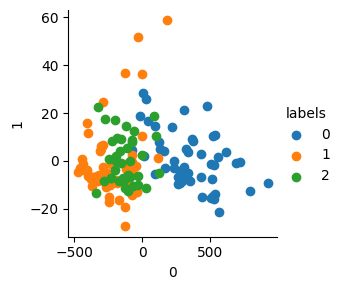

dataset: wine
Precomputed kernel classification test score and time: (0.75, 86.89774775505066) 
 Callable kernel   classification test score: (0.75, 84.64608812332153) 
 normal svc test score : (0.6388888888888888, 1.0040521621704102) 


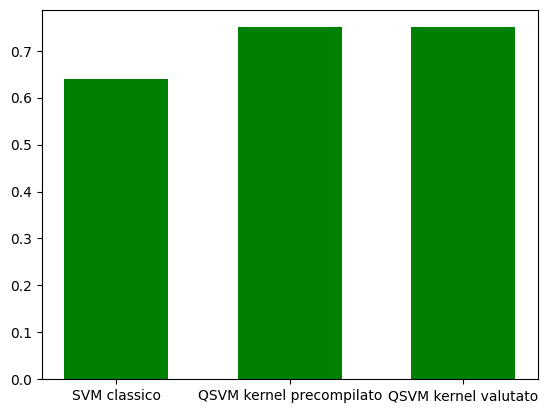

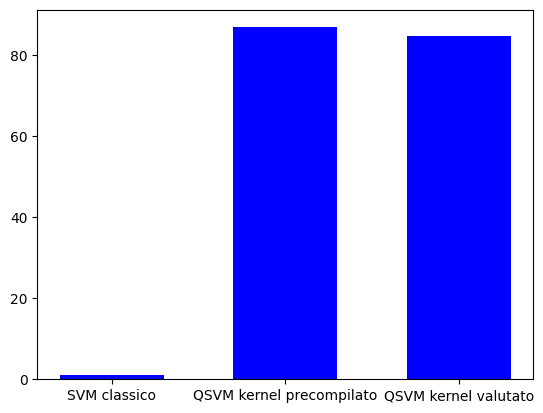

(150, 4) (150,)
            0         1  labels
0   -2.433298 -0.207717       0
1   -2.262523  0.408714       0
2    0.325242 -0.656856       1
3    0.623789 -0.641961       1
4    0.798022 -0.387628       1
..        ...       ...     ...
115  2.764674  0.394206       2
116  2.683219  0.041009       2
117 -2.061834  0.437909       0
118  2.313323 -0.171339       2
119  3.626799  1.236047       2

[120 rows x 3 columns]


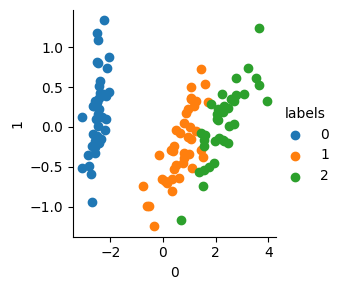

dataset: iris
Precomputed kernel classification test score and time: (0.6333333333333333, 56.00194954872131) 
 Callable kernel   classification test score: (0.6, 56.41809844970703) 
 normal svc test score : (0.9333333333333333, 1.0134336948394775) 


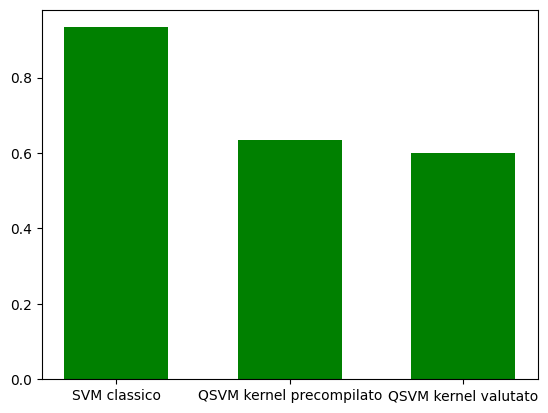

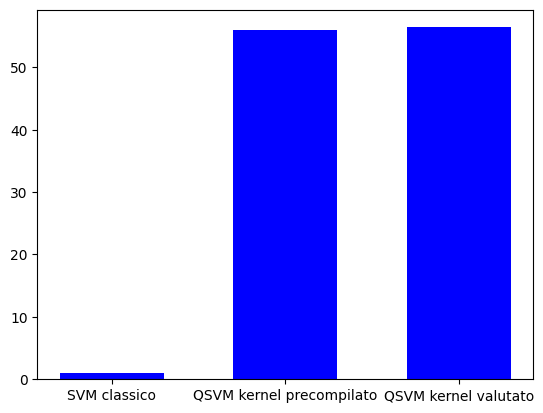

(569, 30) (569,)
              0           1  labels
0   -101.939072 -188.086796       0
1    812.738352  -74.222052       0
2   -126.902987  -31.127648       0
3   -302.482795   -5.767616       1
4   -150.664034    2.328102       0
..          ...         ...     ...
450  457.824750  119.619336       1
451 -374.021618   16.374097       1
452 -709.626824  -57.019093       1
453 -321.512208   26.846225       1
454  333.814536  -18.766916       0

[455 rows x 3 columns]


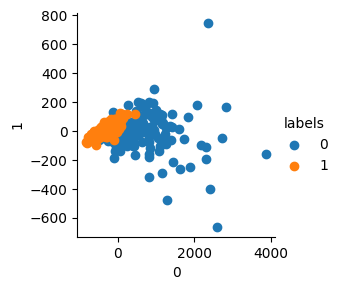

In [ ]:

from matplotlib import pyplot as plt
import time
from sklearn.svm import SVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import ZZFeatureMap
from Dataset.PreProcessing import caricaDataset


scoreQuantum = [] 
scoreQuantumk = [] 
scoreNormal = []

for dataset in ["digit","wine","iris","breast_cancer","ad hoc"]:
    score = {}
    scoreT = {}
    n_dim, sample_train, label_train, sample_test, label_test = caricaDataset(dataset)
    
    
    num_qubits = n_dim
    feature_map = ZZFeatureMap(feature_dimension=n_dim, 
                               reps=2, entanglement='linear')    
    
    # Create the quantum kernel
    adhoc_kernel = QuantumKernel(feature_map=feature_map, 
                                 quantum_instance=Aer.get_backend('qasm_simulator'))
    
    time_classic_kernel_pre = time.time()
    time.sleep(1)
    normal_svc = SVC(kernel="linear")
    normal_svc.fit(sample_train, label_train)
    y = normal_svc.score(sample_test, label_test)
    time_classic_kernel_post = time.time()
    y_time = time_classic_kernel_post - time_classic_kernel_pre
    scoreNormal.append(y)
    score["SVM classico"] = y
    scoreT["SVM classico"] = y_time
    
    
    time_quantum_prekernel_pre = time.time()
    time.sleep(1)
    matrix_train = adhoc_kernel.evaluate(x_vec=sample_train)
    matrix_test = adhoc_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)
    zzpc_svc = SVC(kernel='precomputed')
    zzpc_svc.fit(matrix_train, label_train)
    z = zzpc_svc.score(matrix_test, label_test)
    time_quantum_prekernel_post = time.time()
    z_time = time_quantum_prekernel_post - time_quantum_prekernel_pre
    scoreQuantumk.append(z)
    score["QSVM kernel precompilato"] = z
    scoreT["QSVM kernel precompilato"] = z_time
    
    time_quantum_kernel_pre = time.time()
    time.sleep(1)
    quantum_svc = SVC(kernel=adhoc_kernel.evaluate)
    quantum_svc.fit(sample_train, label_train)
    x = quantum_svc.score(sample_test, label_test)
    time_quantum_kernel_post = time.time()
    x_time = time_quantum_kernel_post - time_quantum_kernel_pre
    scoreQuantum.append(x)
    score["QSVM kernel valutato"] = x
    scoreT["QSVM kernel valutato"] = x_time
    
    print(f'dataset: ' + dataset)
    print(f'Precomputed kernel classification test score and time: {z,z_time} \n Callable kernel   classification test score: {x,x_time} \n normal svc test score : {y,y_time} \n')
    print("\n")
    
    plt.bar(list(score.keys()),list(score.values()), color = "green",width=0.6)
    plt.show()
    plt.bar(list(scoreT.keys()),list(scoreT.values()), color = "blue",width=0.6)
    plt.show()
    